In [6]:
#Interactive 3d plot. also need `pip3 install ipympl`
%matplotlib widget

# Time dependent Diffusion
In this note, we consider a diffusion problem, which is the simplest extension of the Poisson problem into the time domain. The solution $u= u(t,x,y)$, with boundary $g(t, x, y)$ and initial condition $I(x,y)$.
\begin{equation}
\begin{aligned}
\frac{\partial u}{\partial t} & =\nabla \cdot \kappa \nabla u+f \quad \text { in } \Omega, \text { for } t>0 \\
u & =g \quad \text { on } \partial \Omega, \text { for } t>0 \\
u & =I \quad \text { at } t=0 .
\end{aligned}
\end{equation}

### Time discretization
Our FEMSolver developed so far can only solve time-independent problems. For time-dependent problem, we first discretize the time derivative by a finite difference, which yields a recursive set of stationary (time-independent) problems, then call FEMSolver to solve them.

Suppose the constant step size is $\mathrm{d}t$, and denote the functions at $k$-th step by superscript, i.e. $u^{k}(x,y) \approx u(k \mathrm{d}t,x, y)$. Then at $k$ step, the stationary problem w.r.t. $u^k$ is:
$$
\begin{aligned}
\frac{u^k-u^{k-1}}{\mathrm{~d} t} &=\nabla \cdot \kappa \nabla u^k+f(k \mathrm{d}t) \quad \text { in } \Omega \\
u^k  &=g(k \mathrm{d}t) \quad \text { on } \partial \Omega
\end{aligned}
$$
The $u^{k-1}$ is known from computations at the previous time step, and the $u$ at $0$-th time step is given by initial condition $I$.

Reorder the equation so that $u^k$ appears on LHS only, and solve it by FEMSolver.
\begin{aligned}
u^k - \mathrm{~d} t \nabla \cdot \kappa \nabla u^k  &= u^{k-1}+\mathrm{d} t f(k \mathrm{d}t) \quad \text { in } \Omega \\
u^k  &=g(k \mathrm{d}t) \quad \text { on } \partial \Omega
\end{aligned}

In [2]:
### Example 1
from femsolver import FEMSolverV1, FEMSolverV2
from scipy.interpolate import LinearNDInterpolator
import sympy as sym
import numpy as np
t, x, y = sym.symbols('t, x y')
u = sym.sin(t)*(1 + x**2) + x - y**2
kappa = t + sym.sin(x) + sym.cos(y)
lambda_ = 1
f = sym.diff(u, t) - sym.diff(kappa*sym.diff(u, x), x) - sym.diff(kappa*sym.diff(u, y), y)
f = sym.simplify(f)
g = u
I = sym.simplify(u.subs(t, 0))
print('kappa=',kappa)
print('I=',I)
print("f=",f)
print("u_exact=", u)

# convert to numpy funcs
kappa = sym.lambdify([(t, x, y)], kappa, 'numpy')
f = sym.lambdify([(t, x, y)], f, 'numpy')
I = sym.lambdify([(x, y)], I, 'numpy')
g = sym.lambdify([(t, x, y)], g, 'numpy')
u_exact = sym.lambdify([(t, x, y)], u, 'numpy')

kappa= t + sin(x) + cos(y)
I= x - y**2
f= 2*t - 2*y*sin(y) + (x**2 + 1)*cos(t) - (2*x*sin(t) + 1)*cos(x) - 2*(t + sin(x) + cos(y))*sin(t) + 2*sin(x) + 2*cos(y)
u_exact= x - y**2 + (x**2 + 1)*sin(t)


iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14
iter 15
iter 16
iter 17
iter 18
iter 19
Mean Abs Error= 0.041540933771651564


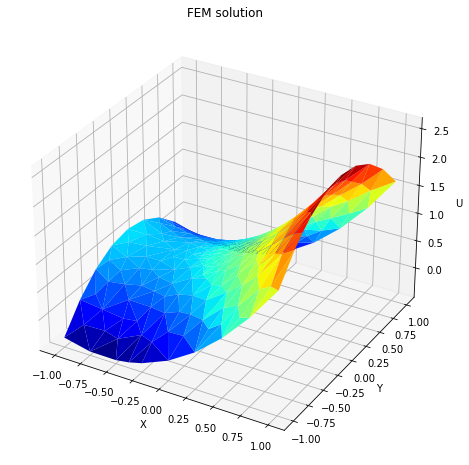

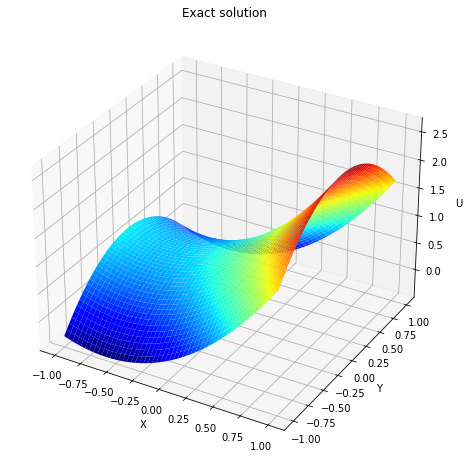

In [3]:
T = 1
K = 20
dt = T/K
s = FEMSolverV1()
s.setDomain([(-1, -1), (1, -1), (1, 1), (-1, 1)], [(-1, -1), (1, -1), (1, 1), (-1, 1)])
u_k = I(s.nodes.T)
u_list = list()
lambda_ = lambda xcev: 1
for k in range(K):
    g_k = lambda xvec: g((dt*k, xvec[0], xvec[1]))
    f_k = lambda xvec: LinearNDInterpolator(s.nodes, u_k)(xvec) + dt* f((dt*k, xvec[0], xvec[1]))
    kappa_k = lambda xvec: dt* kappa((dt*k, xvec[0], xvec[1]))
    u_kp1 = s.solve(kappa_k, f_k, g_k, lambda_=lambda_,visualize=False)
    u_k = u_kp1
    u_list.append(u_k)
    print("iter", k)
u_K = u_k
u_exact_K = lambda xvec: u_exact((dt*K, xvec[0], xvec[1]))
s.visualize(u_k, u_exact_K)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

fig = plt.figure()
ax = fig.add_subplot(projection='3d')


def update(k, u_list, plot):
    #plot.remove()
    ax.clear()
    u_k = u_list[k]
    plot = ax.plot_trisurf(s.nodes[:,0], s.nodes[:,1], u_k, triangles=s.elements, cmap=plt.cm.jet, linewidth=0.2)
    return plot,

plot = ax.plot_trisurf(s.nodes[:,0], s.nodes[:,1], u_list[0], triangles=s.elements, cmap=plt.cm.jet)

# Setting the axes properties
ax.set_xlim3d([-1.0, 1.0])
ax.set_xlabel('X')

ax.set_ylim3d([-1.0, 1.0])
ax.set_ylabel('Y')

ax.set_zlim3d([-5.0, 10.0])
ax.set_zlabel('U')

ani = animation.FuncAnimation(fig, update, K, fargs=(u_list, plot), interval=200, blit=False)
#ani.save('matplot003.gif', writer='imagemagick')
plt.show()

NameError: name 's' is not defined

In [4]:
np.arange(1,3)

array([1, 2])